In [1]:
from core.option import Option

opt = Option(S=100, K=100, T=1, r=0.05, sigma=0.2, option_type='put', style='american')
print(opt.describe())

{'Spot Price (S)': 100, 'Strike Price (K)': 100, 'Time to Maturity (T)': 1, 'Risk-Free Rate (r)': 0.05, 'Volatility (σ)': 0.2, 'Option Type': 'put', 'Option Style': 'american'}


In [2]:
from core.option import Option
from core.pricers.binomial import price_american_binomial

opt = Option(S=100, K=100, T=1, r=0.05, sigma=0.2, option_type='put', style='american')
price = price_american_binomial(opt, steps=200)
print(f"Binomial American Put Price: {price:.4f}")

Binomial American Put Price: 6.0864


In [3]:
from core.option import Option
from core.pricers.binomial import price_american_binomial
from core.greeks import compute_delta, compute_gamma, compute_theta, compute_vega, compute_rho

opt = Option(S=100, K=100, T=1, r=0.05, sigma=0.2, option_type='put', style='american')
price = price_american_binomial(opt, steps=200)

delta = compute_delta(price_american_binomial, opt)
gamma = compute_gamma(price_american_binomial, opt)
theta = compute_theta(price_american_binomial, opt)
vega = compute_vega(price_american_binomial, opt)
rho = compute_rho(price_american_binomial, opt)

print(f"Price: {price:.4f}")
print(f"Delta: {delta:.4f}")
print(f"Gamma: {gamma:.4f}")
print(f"Theta: {theta:.4f}")
print(f"Vega : {vega:.4f}")
print(f"Rho  : {rho:.4f}")

Price: 6.0864
Delta: -0.4225
Gamma: 2.8498
Theta: 2.2346
Vega : 37.4405
Rho  : -30.1901


In [4]:
from core.option import Option
from core.pricers.fd_explicit import price_american_fd_explicit

opt = Option(S=100, K=100, T=1, r=0.05, sigma=0.2, option_type='put', style='american')
price = price_american_fd_explicit(opt, M=100, N=100)
print(f"American Put Price (FDM Explicit): {price:.4f}")

[Warning] dt = 0.01000 is too large for stability. Reducing to dt_stable = 0.00250.
American Put Price (FDM Explicit): 6.0826


In [5]:
from core.option import Option
from core.pricers.fd_implicit import price_american_fd_implicit

opt = Option(S=100, K=100, T=1, r=0.05, sigma=0.2, option_type='put', style='american')
price = price_american_fd_implicit(opt, M=100, N=100)
print(f"American Put Price (FDM Explicit): {price:.4f}")

American Put Price (FDM Explicit): 6.0562


In [7]:
from core.option import Option
from core.pricers.fd_cn import price_american_fd_cn

opt = Option(S=100, K=100, T=1, r=0.05, sigma=0.2, option_type='put', style='american')
price = price_american_fd_cn(opt)
print(f"American Put Price (FDM Crank-Nicolson): {price:.4f}")

American Put Price (FDM Crank-Nicolson): 6.0739


In [8]:
from core.option import Option
from core.pricers.monte_carlo_lsm import price_american_mc_lsm

opt = Option(S=100, K=100, T=1, r=0.05, sigma=0.2, option_type='put', style='american')
price = price_american_mc_lsm(opt, n_paths=10000, n_steps=50, poly_degree=2)
print(f"American Put Price (Monte Carlo LSM): {price:.4f}")

American Put Price (Monte Carlo LSM): 6.0926


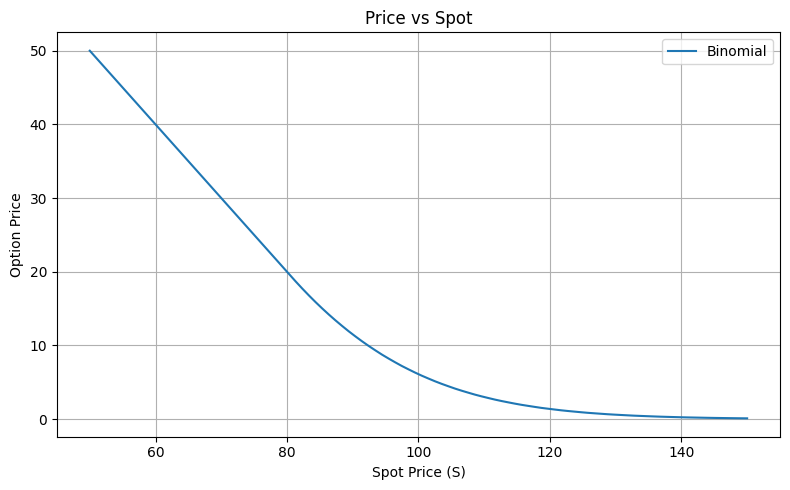

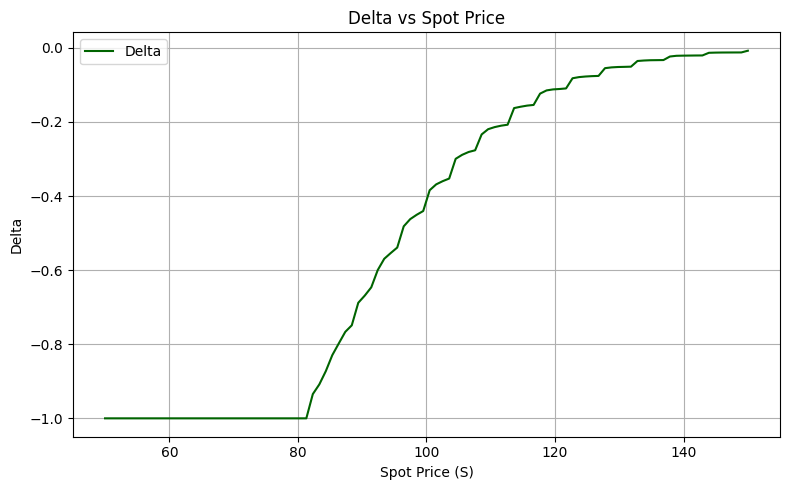

In [9]:
from core.option import Option
from core.pricers.binomial import price_american_binomial
from core.greeks import compute_delta
from utils.plotter import plot_price_vs_spot, plot_greek_vs_spot

opt = Option(S=100, K=100, T=1, r=0.05, sigma=0.2, option_type='put', style='american')

plot_price_vs_spot(price_american_binomial, opt, S_range=(50, 150), steps=200, label="Binomial")
plot_greek_vs_spot(compute_delta, price_american_binomial, opt, greek_name="Delta")

In [10]:
from core.option import Option
from core.pricers.fd_implicit import price_american_fd_implicit
from utils.validators import black_scholes_price

opt = Option(S=100, K=100, T=1, r=0.05, sigma=0.2, option_type='put', style='american')

price_american = price_american_fd_implicit(opt)
opt.style = 'european'
price_european = black_scholes_price(opt)

print(f"American Put (FD Implicit): {price_american:.4f}")
print(f"European Put (Black-Scholes): {price_european:.4f}")
print(f"Early Exercise Premium: {price_american - price_european:.4f}")

American Put (FD Implicit): 6.0562
European Put (Black-Scholes): 5.5735
Early Exercise Premium: 0.4826
